# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Jonathan Mejia

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: JM

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [23]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [24]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [25]:
# make sure numpy is installed
!pip install -q numpy

In [83]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [84]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [85]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [86]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: west
step 2 - action: suck
step 3 - action: west
step 4 - action: east
step 5 - action: south
step 6 - action: north
step 7 - action: south
step 8 - action: north
step 9 - action: suck
step 10 - action: east
step 11 - action: south
step 12 - action: east
step 13 - action: south
step 14 - action: south
step 15 - action: east
step 16 - action: east
step 17 - action: suck
step 18 - action: west
step 19 - action: suck


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [87]:
# Your code and description goes here

import numpy as np
import collections


def environment(agent_function, room_size, verbose = True):
## Initialising the invironment by storing state of each square at random to be clean or dirty
  rng = np.random.default_rng()
  environment = rng.choice(["Dirty","Clean"],size = (room_size,room_size))
  #print(environment)

## Initialize a random position of the agent to then keep track of
  agent_position = (np.random.randint(0,room_size), np.random.randint(0,room_size))
#  print(agent_position)

  directions = {
        "north": (-1,0),
        "south": (1,0),
        "east": (0,1),
        "west": (0,-1)
   }
  bumpers = {}
  num_cleaned = 0
  counter= np.count_nonzero(environment == "Dirty")
  #print(counter)
  step = 1
  while 0 < counter:

   for dir, (x,y) in directions.items():
     try:
       pos = agent_position[0] + x, agent_position[1] + y
       if pos[0] < 0 or pos[1]<0 or pos[0]>=environment.shape[0] or pos[1]>=environment.shape[1]:
         raise IndexError
       else:
         bumpers[dir] = False
     except IndexError:
        bumpers[dir] = True
   dirty = environment[agent_position]

## Sees how many tiles are dirty
   counter= np.count_nonzero(environment == "Dirty")

## iterate until the max steps are met


   action = agent_function(bumpers, dirty)
   ### Just for testing
   if action == "NA": break

   if action == "north" and bumpers[action] != True: agent_position = agent_position[0] - 1 , agent_position[1]
   if action == "south" and bumpers[action] != True: agent_position = agent_position[0] + 1 , agent_position[1]
   if action == "east" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] + 1
   if action == "west" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] - 1
   #if (verbose): print("step", step , "- action:", action," Position: ", agent_position)

   if (action == "suck"):
      environment[agent_position] = 'Clean'
   step = step + 1
   counter= np.count_nonzero(environment == "Dirty")

  print(environment)
  #print(f"The robot took {step} steps to clean the entire room.")
  return step




#  counter= np.count_nonzero(environment == "Dirty")
#  print("\nThere are " , counter , " occurences of a block being dirty")





Show that your environment works with the simple randomized agent from above.

In [88]:
# Your code and description goes here

print(f"Took the agent {environment(simple_randomized_agent,5)} steps to clean the room")


[['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']]
Took the agent 742 steps to clean the room


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [89]:
# Your code and description goes here

def simple_reflex_agent(bumpers, dirty):
    rng = np.random.default_rng()
    random_dir_available = []
    if dirty == "Dirty":
      return 'suck'
    for i in bumpers:
      if bumpers[i] == False: random_dir_available.append(i)
    return rng.choice(random_dir_available)

Show how the agent works with your environment.

In [90]:
# Your code and description goes here

print(f"Took the simple reflex agent {environment(simple_reflex_agent,5)} steps to clean the room")



[['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']]
Took the simple reflex agent 69 steps to clean the room


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [91]:
# Your short description of the state and your implementation goes here
class Agent:
  def __init__(self):
    self.position = (0,0)
    self.visited = []
    self.start_cleaning = False

  def act(self, bumpers, dirty):
    while self.start_cleaning == False:
      if bumpers['north'] != True: return 'north'
      if bumpers['west'] != True: return 'west'
      self.start_cleaning = True
 #     print(self.start_cleaning)
    if dirty == 'Dirty': return 'suck'
    self.visited.append(self.position)
    while bumpers['south']!= True and (self.position[0] + 1, self.position[1]) not in self.visited:
      self.position = self.position[0] + 1, self.position[1]
      return 'south'
    while bumpers['east']!= True and (self.position[0], self.position[1]+1) not in self.visited:
      self.position = self.position[0] , self.position[1] + 1
      return 'east'
    while bumpers['north']!= True and (self.position[0]-1, self.position[1]) not in self.visited:
      self.position = self.position[0]-1 , self.position[1]
      return 'north'
    while bumpers['west']!= True and (self.position[0], self.position[1]-1) not in self.visited:
      self.position = self.position[0] , self.position[1] - 1
      return 'west'
 #   print(self.visited)
    return "NA"



In [92]:
# Your code goes here
agent = Agent()

def model_based_agent(bumpers, dirty):
  return agent.act(bumpers,dirty)


Show how the agent works with your environment.

In [93]:
# Your code goes here

print(f"Took the simple reflex agent {environment(model_based_agent,5)} steps to clean the room")



[['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']
 ['Clean' 'Clean' 'Clean' 'Clean' 'Clean']]
Took the simple reflex agent 40 steps to clean the room


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [44]:
# Your code goes here

runs = [5,10,100]

model_avg = 0

for i in range(len(runs)):

  for j in range(100):

    agent = Agent()
    model_avg = model_avg + environment(model_based_agent,runs[i])

  print(f"Model based reflex agent took an average over 100 iterations {model_avg/100} steps to clean a {runs[i]} X {runs[i]} room ")

  model_avg = 0



Model based reflex agent took an average over 100 iterations 10.15 steps to clean a 5 X 5 room 
Model based reflex agent took an average over 100 iterations 39.74 steps to clean a 10 X 10 room 
Model based reflex agent took an average over 100 iterations 3773.36 steps to clean a 100 X 100 room 


In [47]:
runs = [5,10,100]

reflex_avg = 0

for i in range(len(runs)):

  for j in range(100):

    reflex_avg = reflex_avg + environment(simple_reflex_agent,runs[i])

  print(f"Simple reflex agent took an average over 100 iterations {reflex_avg/100} steps to clean a {runs[i]} X {runs[i]} room ")

  reflex_avg = 0


Simple reflex agent took an average over 100 iterations 40.19 steps to clean a 5 X 5 room 
Simple reflex agent took an average over 100 iterations 256.3 steps to clean a 10 X 10 room 
Simple reflex agent took an average over 100 iterations 103953.4 steps to clean a 100 X 100 room 


In [49]:
runs = [5,10,100]

random_avg = 0

for i in range(len(runs)):

  for j in range(100):

    random_avg = random_avg + environment(simple_randomized_agent,runs[i])

  print(f"Simple random agent took an average over 100 iterations {random_avg/100} steps to clean a {runs[i]} X {runs[i]} room ")

  random_avg = 0


Simple random agent took an average over 100 iterations 147.04 steps to clean a 5 X 5 room 
Simple random agent took an average over 100 iterations 890.4 steps to clean a 10 X 10 room 
Simple random agent took an average over 100 iterations 226275.76 steps to clean a 100 X 100 room 


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Model-based Reflex Agent | Simple Reflex Agent | Randomized Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |10.15|40.19|147.04|
| 10x10   | 39.74|256.3|890.4|
| 100x100 | 3773.36|103953.4|226275.76|

Add charts to compare the performance of the different agents.

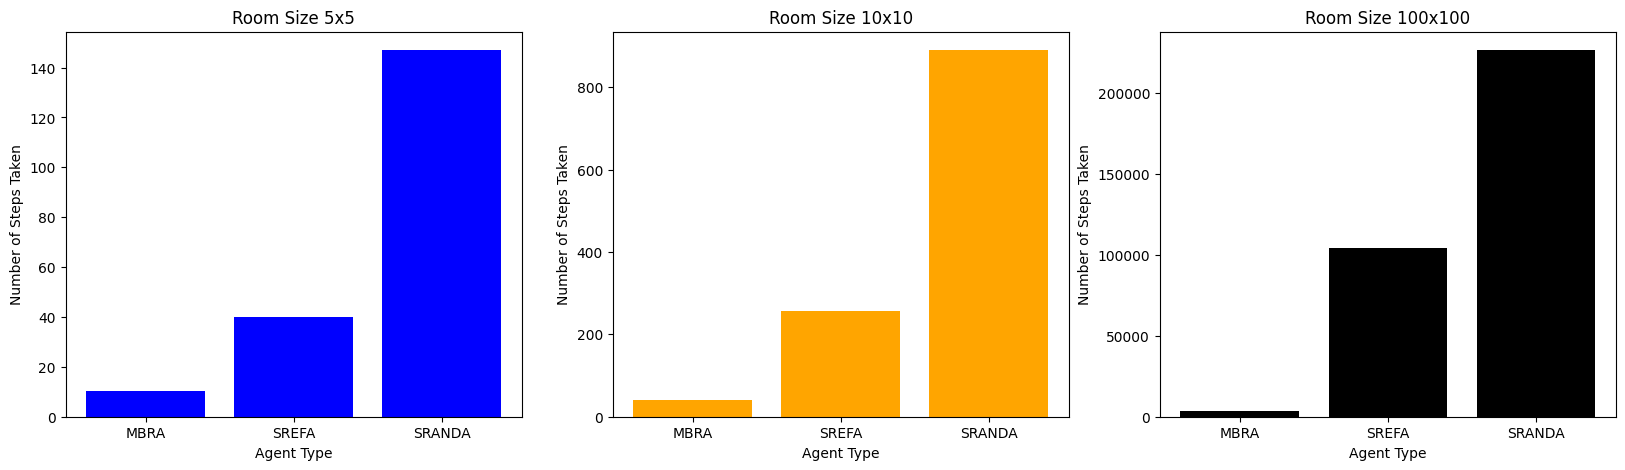

In [94]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

categories = ['MBRA','SREFA', 'SRANDA']
values5x5 = [10.15,40.19,147.04]
values10x10 = [39.74, 256.3, 890.4]
values100x100 = [3773.36,103953.4,226275.76]

plt.figure(figsize=(20,5))
# First chart (Bar chart)
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.bar(categories, values5x5, color='blue')
plt.title("Room Size 5x5")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')
# First chart (Bar chart)
plt.subplot(1, 3, 2)  # (rows, columns, index)
plt.bar(categories, values10x10, color='orange')
plt.title("Room Size 10x10")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')
# First chart (Bar chart)
plt.subplot(1, 3, 3)  # (rows, columns, index)
plt.bar(categories, values100x100, color='black')
plt.title("Room Size 100x100")
plt.xlabel('Agent Type')
plt.ylabel('Number of Steps Taken')


plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

**ANSWER: Task 5 Robustness of the agent implementations**
* if it is put into a rectangular room with unknown size,
 * The model based agent looks to find the upper left corner of the room and then takes a whirpool approach that would be able to handle the following given approach.
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
 * If the cleaning area had an irregular shape, the algorithm implemented would not be able to handle this case for a narrow hallway for example since the robot would have captured the area and look for the outter most walls each time. Eventually have one room completed upon cleaned and the other left not fully clean.
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
 * The model based algorithm would work for the environment in most cases however given a scenario where an obstacle is near a corner and creates a small hallway this will cause the agent to believe the room is completely clean which is false.
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [152]:
# Your code and discussion goes here
# Your code and description goes here

import numpy as np
import collections


def environment(agent_function, room_size, verbose = True):
## Initialising the invironment by storing state of each square at random to be clean or dirty
  rng = np.random.default_rng()
  environment = rng.choice(["Dirty","Clean"],size = (room_size,room_size))
  #print(environment)
  squares_cleaned = 0
## Initialize a random position of the agent to then keep track of
  agent_position = (np.random.randint(0,room_size), np.random.randint(0,room_size))
#  print(agent_position)

  directions = {
        "north": (-1,0),
        "south": (1,0),
        "east": (0,1),
        "west": (0,-1)
   }
  bumpers = {}
  num_cleaned = 0
  counter= np.count_nonzero(environment == "Dirty")
  orig_dirty = np.count_nonzero(environment == "Dirty")
  #print(counter)
  step = 1
  while 0 < counter:

   for dir, (x,y) in directions.items():
     try:
       pos = agent_position[0] + x, agent_position[1] + y
       if pos[0] < 0 or pos[1]<0 or pos[0]>=environment.shape[0] or pos[1]>=environment.shape[1]:
         raise IndexError
       else:
         bumpers[dir] = False
     except IndexError:
        bumpers[dir] = True
   dirty = environment[agent_position]
   if dirty == "Dirty":
    dirty = rng.choice(["Dirty","Clean"], p = [.1, .9])
## Sees how many tiles are dirty
   counter= np.count_nonzero(environment == "Dirty")

## iterate until the max steps are met


   action = agent_function(bumpers, dirty)
   ### Just for testing
   if action == "NA": break

   if action == "north" and bumpers[action] != True: agent_position = agent_position[0] - 1 , agent_position[1]
   if action == "south" and bumpers[action] != True: agent_position = agent_position[0] + 1 , agent_position[1]
   if action == "east" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] + 1
   if action == "west" and bumpers[action] != True: agent_position = agent_position[0], agent_position[1] - 1
   #if (verbose): print("step", step , "- action:", action," Position: ", agent_position)

   if (action == "suck"):
      if environment[agent_position] != 'Clean':
        squares_cleaned = squares_cleaned + 1
      environment[agent_position] = 'Clean'

   step = step + 1
   counter= np.count_nonzero(environment == "Dirty")

  #print(environment)
  #print(f"The robot took {step} steps to clean the entire room.")
  return [step,squares_cleaned,orig_dirty]




#  counter= np.count_nonzero(environment == "Dirty")
#  print("\nThere are " , counter , " occurences of a block being dirty")




In [150]:

agent = Agent()
mba = environment(model_based_agent,5)
sra = environment(simple_reflex_agent,5)
sranda = environment(simple_randomized_agent,5)

print(f"Model base reflex agent took {mba[0]} steps to clean a 5x5.\n The agent was able to clean {round(mba[1]/mba[2]*100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(mba[1]/mba[0]*100,2)}%")
print(f"\nSimple reflex agent took {sra[0]} steps to clean a 5x5.\n The agent was able to clean {round(sra[1]/sra[2] * 100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(sra[1]/sra[0]*100,2)}%")
print(f"\nSimple randomized agent took {sranda[0]} steps to clean a 5x5.\n The agent was able to clean {round(sranda[1]/sranda[2] * 100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(sranda[1]/sranda[0]*100,2)}%")

Model base reflex agent took 27 steps to clean a 5x5.
 The agent was able to clean 0.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 0.0%

Simple reflex agent took 760 steps to clean a 5x5.
 The agent was able to clean 100.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 1.84%

Simple randomized agent took 894 steps to clean a 5x5.
 The agent was able to clean 100.0% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 1.45%


In [ ]:
# Your short description of the state and your implementation goes here
class Agent:
  def __init__(self):
    self.position = (0,0)
    self.visited = []
    self.start_cleaning = False
    self.counter = 100

  def act(self, bumpers, dirty):
    while self.start_cleaning == False:
      if bumpers['north'] != True: return 'north'
      if bumpers['west'] != True: return 'west'
      self.start_cleaning = True
 #     print(self.start_cleaning)
    if dirty == 'Dirty': return 'suck'
    self.visited.append(self.position)
    while bumpers['south']!= True and (self.position[0] + 1, self.position[1]) not in self.visited:
      self.position = self.position[0] + 1, self.position[1]
      return 'south'
    while bumpers['east']!= True and (self.position[0], self.position[1]+1) not in self.visited:
      self.position = self.position[0] , self.position[1] + 1
      return 'east'
    while bumpers['north']!= True and (self.position[0]-1, self.position[1]) not in self.visited:
      self.position = self.position[0]-1 , self.position[1]
      return 'north'
    while bumpers['west']!= True and (self.position[0], self.position[1]-1) not in self.visited:
      self.position = self.position[0] , self.position[1] - 1
      return 'west'
 #   print(self.visited)
    if self.counter>0:
      self.visited = []
      self.start_cleaning == False
      self.counter = self.counter - 1
    return "NA"

In [151]:
agent = Agent()
mba = environment(model_based_agent,5)
print(f"Model base reflex agent took {mba[0]} steps to clean a 5x5.\n The agent was able to clean {round(mba[1]/mba[2]*100,2)}% of the dirty squares,\n while the energy efficiency of the agents cleanliness is {round(mba[1]/mba[0]*100,2)}%")


Model base reflex agent took 30 steps to clean a 5x5.
 The agent was able to clean 11.11% of the dirty squares,
 while the energy efficiency of the agents cleanliness is 6.67%


## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code